In [61]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Load data (from csv file)

In [118]:
def load_data(path):
    data = pd.read_csv(path).dropna().values
    
    x_ = data[:, 0]
    y_ = data[:, 1]
    
    return torch.from_numpy(x_).unsqueeze(1).float(), torch.from_numpy(y_).unsqueeze(1).float()

In [119]:
train_data_path = "../data/linear-regression/train.csv"
val_data_path = "../data/linear-regression/test.csv"

x_train, y_train = load_data(train_data_path)
x_val, y_val = load_data(val_data_path)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([699, 1]),
 torch.Size([699, 1]),
 torch.Size([300, 1]),
 torch.Size([300, 1]))

### Visualize data

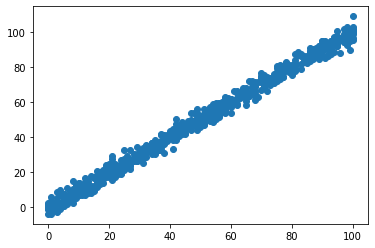

In [120]:
plt.scatter(x_train, y_train)
plt.show()

### Training function

In [126]:
def predict(x, w, b):
    return x @ w + b

def loss_fn(x, y, w, b):
    yhat = predict(x, w, b)
    diff = (yhat - y)**2
    return diff.mean()

def traning_loops(n_epochs, train_data, val_data, optimzer, params):
    loss_hist = {'train':torch.zeros(n_epochs), 'val':torch.zeros(n_epochs)}
    
    x_train, y_train = train_data
    x_val, y_val = val_data
    for i in range(1, n_epochs+1):
        predicted = predict(x_train, *params)
        loss = loss_fn(x_train, y_train, *params)
        
        optimzer.zero_grad()
        loss.backward()
        optimzer.step()
        
        loss_hist['train'][i-1] = loss
        with torch.no_grad():
            predicted = predict(x_val, *params)
            val_loss = loss_fn(x_val, y_val, *params)
            loss_hist['val'][i-1] = val_loss
            
        if i % 100 == 0:
            print(f"Epoch: {i} loss {loss}")
    
    return params, loss_hist

### Initialize params

In [127]:
w = torch.ones(x.shape[1], 1, requires_grad=True)
b = torch.zeros(x.shape[1], 1, requires_grad=True)
lr = 1e-2
optimzer = torch.optim.Adam([w, b], lr=lr)

### Training the model

In [128]:
n_epochs = 100
params, loss_hist = traning_loops(n_epochs, (x_train, y_train), (x_val, y_val), optimzer, [w, b])

Epoch: 100 loss 7.867793083190918


### Display the result

In [129]:
x_plt = torch.linspace(int(x_train.min().item()-1), int(x_train.max().item()+1)).unsqueeze(1)

y_plt = x_plt * w + b
y_plt = y_plt.detach()

x_plt.shape, y_plt.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

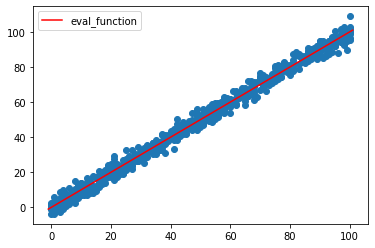

In [130]:
plt.scatter(x_train, y_train)
plt.plot(x_plt, y_plt, c='red', label='eval_function')
plt.legend()
plt.show()

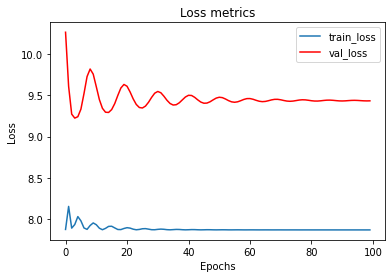

In [131]:
epoch_plt = torch.arange(n_epochs)
train_loss = loss_hist['train'].detach()
val_loss = loss_hist['val'].detach()

plt.plot(epoch_plt, train_loss, label='train_loss')
plt.plot(epoch_plt, val_loss, label='val_loss', c='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss metrics")
plt.show()